In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline
pd.options.display.precision = 4

### Load your pickled data

In [2]:
df = pd.read_pickle('../1.Titanic/Data/df.pickle')

In [3]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
name,,,,,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,211.3375,S
"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,151.5500,S
"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,151.5500,S
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,151.5500,S
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,151.5500,S


In [4]:
# We have 1306 observations/passengers and 9 features to analyze
df.shape

(1306, 8)

## Exploratory Data Analysis (EDA) - aka Visualization
The point of this competition is to predict if an individual will survive based on the features in the data. Let’s see if we can gain a better understanding of who survived and died by visualizing the data.

### First let’s plot a bar graph of those who survived vs. those who did not

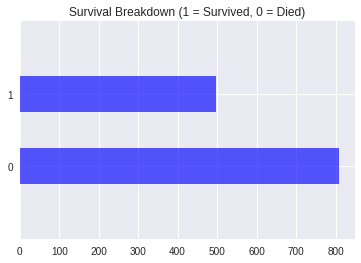

In [5]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df['survived'].value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df['survived'].value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

### Let’s break the previous graph down by gender

(-1, 2)

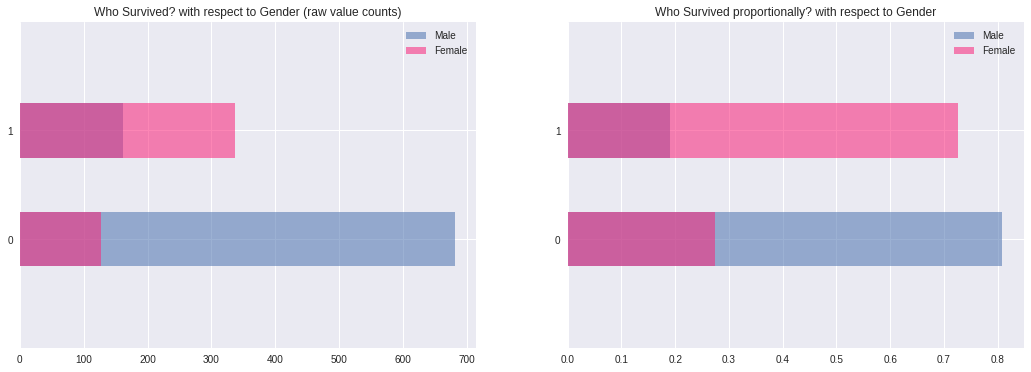

In [6]:
fig = plt.figure(figsize=(18,6))

# Create a plot of two subsets, male and female, of the survived variable.
# After we do that we call value_counts() so it can be easily plotted as a bar graph. 

df_male = df['survived'][df['sex'] == 'male'].value_counts().sort_index()
df_female = df['survived'][df['sex'] == 'female'].value_counts().sort_index()

# 'barh' is just a horizontal bar graph
ax1 = fig.add_subplot(1,2,1)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender (raw value counts)"); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(1,2,2)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

### Can we capture more of the structure by using `Pclass`? Here we will bucket classes as lowest class or any of the high classes (classes 1 - 2). 3 is lowest class. Let’s break it down by Gender and what Class they were traveling in.

In [7]:
df.survived[(df.sex == 'female') & (df.pclass != 3)].value_counts()

1    231
0     17
Name: survived, dtype: int64

In [8]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1=fig.add_subplot(141)
female_highclass = df.survived[(df.sex == 'female') & (df.pclass != 3)].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.survived[(df.sex == 'female') & (df.pclass == 3)].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.survived[(df.sex == 'male') & (df.pclass == 3)].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.survived[(df.sex == 'male') & (df.pclass != 3)].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

Awesome! Now we have a lot more information on who survived and died in the tragedy. With this deeper understanding, we are better equipped to create better more insightful models. This is a typical process in interactive data analysis. First you start small and understand the most basic relationships and slowly increment the complexity of your analysis as you discover more and more about the data you’re working with.

## Make a swarmplot for sex vs age, colored by survival

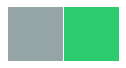

In [9]:
color_legend = ["#95a5a6","#2ecc71"]
sns.palplot(sns.color_palette(color_legend))

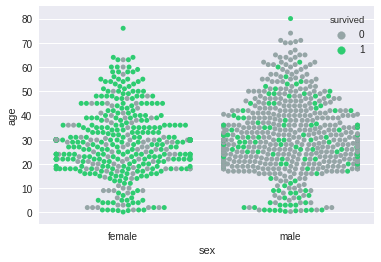

In [10]:
sns.swarmplot(x='sex', y='age', hue='survived', palette=color_legend, data=df)

## Make a correlation matrix

In [11]:
correlation_matrix = df.corr()
correlation_matrix

,pclass,survived,age,sibsp,parch,fare
pclass,1.0000,-0.3101,-0.3667,0.0601,0.0176,-0.5579
survived,-0.3101,1.0000,-0.0521,-0.0272,0.0834,0.2430
age,-0.3667,-0.0521,1.0000,-0.1897,-0.1296,0.1703
sibsp,0.0601,-0.0272,-0.1897,1.0000,0.3733,0.1610
parch,0.0176,0.0834,-0.1296,0.3733,1.0000,0.2223
fare,-0.5579,0.2430,0.1703,0.1610,0.2223,1.0000


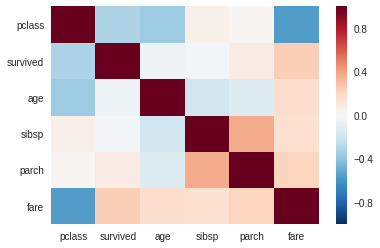

In [12]:
sns.heatmap(correlation_matrix)